In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import os 

In [1]:
os.listdir()

In [ ]:
df_test = pd.read_csv(r"test.csv")
df_train = pd.read_csv(r"train.csv")
df_sub = pd.read_csv(r"sample_submission.csv")
df_test.head(2)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


In [ ]:
df_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [ ]:
df_sub.head(2)

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442


In [ ]:
print(df_test.info())
print(df_train.info())
print(df_sub.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0

In [ ]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<AxesSubplot:>

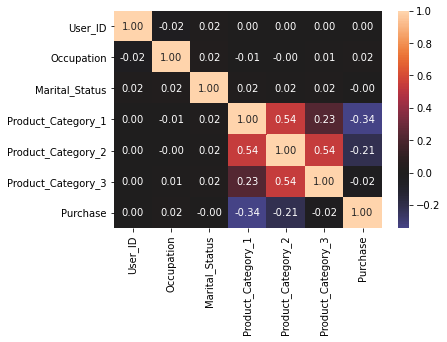

In [ ]:
sns.heatmap(df_train.corr(), annot = True, fmt = '.2f',  center = 0)

In [ ]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
df_train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df_train['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:
df_train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df_train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df_train['Marital_Status'].unique()

array([0, 1])

In [ ]:
df_train['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [ ]:
df_train['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
df_train['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [ ]:
df_train['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

In [ ]:
#df_train = df_train.fillna(0)
df_train["Product_Category_2"]= df_train["Product_Category_2"].fillna(0)
df_train["Product_Category_3"]= df_train["Product_Category_3"].fillna(0)

In [ ]:
df_train.drop(['User_ID','Product_ID'], axis=1, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [ ]:

#df_train['Product_ID'] = df_train['Product_ID'].str.replace('P00', '')
#df_train['Product_ID']=df_train['Product_ID'].astype(int)

In [ ]:
df_train['Gender'] = df_train['Gender'].map({'F': 0,'M': 1})

In [ ]:
df_train['City_Category'] = df_train['City_Category'].map({'A': 0,'B': 1,'C': 2})

In [ ]:
df_train['Age'] = df_train['Age'].map({'0-17': 0,'18-25': 1,'26-35': 2,'36-45': 3,
                                    '46-50': 4,'51-55': 5,'55+': 6})

In [ ]:
df_train['Stay_In_Current_City_Years'] = df_train['Stay_In_Current_City_Years'].map({'0': 0,
'1': 1,'2': 2,'3': 3,'4+': 4})

In [ ]:
df_train.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 42.0 MB
None


In [ ]:
df_train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0.0,0.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,0.0,0.0,1422
3,0,0,10,0,2,0,12,14.0,0.0,1057
4,1,6,16,2,4,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,0.0,0.0,368
550064,0,2,1,2,3,0,20,0.0,0.0,371
550065,0,2,15,1,4,1,20,0.0,0.0,137
550066,0,6,1,2,2,0,20,0.0,0.0,365


<AxesSubplot:title={'center':'Gender'}>

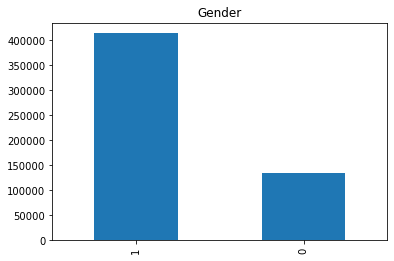

In [ ]:
df_train['Gender'].value_counts().plot(kind='bar', title='Gender')


<AxesSubplot:title={'center':'Age'}>

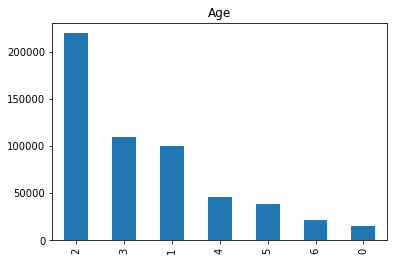

In [ ]:
df_train['Age'].value_counts().plot(kind='bar', title='Age')

<AxesSubplot:title={'center':'City_Category'}>

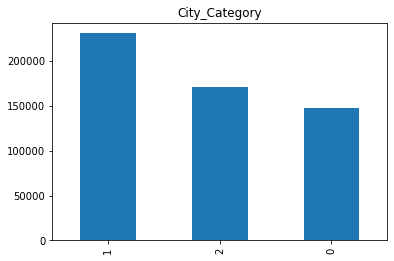

In [ ]:

df_train['City_Category'].value_counts().plot(kind='bar', title='City_Category')


<AxesSubplot:title={'center':'Marital_Status'}>

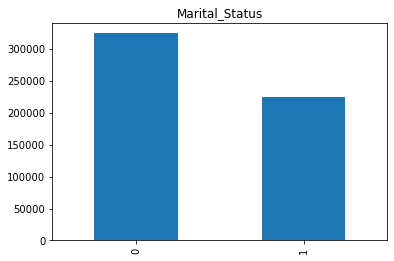

In [ ]:
df_train['Marital_Status'].value_counts().plot(kind='bar', title='Marital_Status')

<AxesSubplot:title={'center':'Occupation'}>

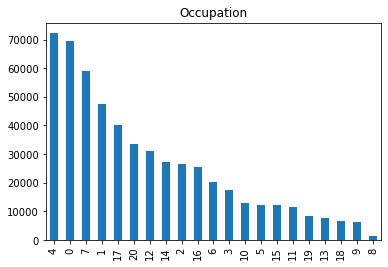

In [ ]:

df_train['Occupation'].value_counts().plot(kind='bar', title='Occupation')

<AxesSubplot:title={'center':'Stay_In_Current_City_Years'}>

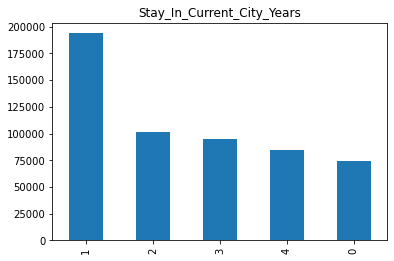

In [ ]:

df_train['Stay_In_Current_City_Years'].value_counts().plot(kind='bar', title='Stay_In_Current_City_Years')

In [ ]:
y=df_train["Purchase"]
X=df_train.drop(columns=["Purchase"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, shuffle=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
from  sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Train Accuracy :", lr.score(X_train,y_train))
print("Test Accuracy :", lr.score(X_test,y_test))

Train Accuracy : 0.15236389336752032
Test Accuracy : 0.1515133407435908


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_train.shape

(440054,)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 600, random_state = 0)
rf.fit(X_train, y_train)
print("Train Accuracy :", rf.score(X_train,y_train))
print("Test Accuracy :", rf.score(X_test,y_test))

Train Accuracy : 0.7922839369217283
Test Accuracy : 0.6338096842284799
